# Hospital Treatment Pricing Prediction
The increasing cost of healthcare services is a major concern, especially for patients in the US. However, if planned properly, it can be reduced significantly.

The purpose of this project is to predict hospital charges before admitting a patient. This will allow people to compare the costs at different medical institutions and plan their finances accordingly in case of elective admissions. It will also enable insurance companies to predict how much a patient with a particular medical condition might claim after a hospitalization.

## Problem
How do we estimate hospital treatment costs based on the patient’s clinical data at admission?

## Procedure
We go about addressing this problem as follows

### We first import all the libraries that's relevent for our predictive analysis

In [1]:
import warnings
warnings.filterwarnings('ignore') # Hide the unsolicited warnings to make the notebook legible

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Load the historical data available and observe it

In [2]:
raw_data = pd.read_csv('../Datasets/inpatientCharges.csv')
raw_data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [3]:
raw_data.describe(include='all')

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065,163065.000000,163065,163065,163065,163065,163065.000000,163065,163065.000000,163065,163065,163065
unique,100,NaN,3201,3326,1977,51,NaN,306,NaN,160236,147842,150328
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,NaN,GOOD SAMARITAN HOSPITAL,100 MEDICAL CENTER DRIVE,CHICAGO,CA,NaN,CA - Los Angeles,NaN,$31155.00,$4370.00,$4908.00
freq,3023,NaN,633,183,1505,13064,NaN,3653,NaN,4,9,5
mean,NaN,255569.865428,NaN,NaN,NaN,NaN,47938.121908,NaN,42.776304,NaN,NaN,NaN
std,NaN,151563.671767,NaN,NaN,NaN,NaN,27854.323080,NaN,51.104042,NaN,NaN,NaN
min,NaN,10001.000000,NaN,NaN,NaN,NaN,1040.000000,NaN,11.000000,NaN,NaN,NaN
25%,NaN,110092.000000,NaN,NaN,NaN,NaN,27261.000000,NaN,17.000000,NaN,NaN,NaN
50%,NaN,250007.000000,NaN,NaN,NaN,NaN,44309.000000,NaN,27.000000,NaN,NaN,NaN
75%,NaN,380075.000000,NaN,NaN,NaN,NaN,72901.000000,NaN,49.000000,NaN,NaN,NaN


### Let's also ensure that the column values have proper data types

In [4]:
data = raw_data.copy()
data[data.columns[9:]] = data[data.columns[9:]].replace('[\$,]', '', regex=True).astype(float)
data['Provider Zip Code'] = data['Provider Zip Code'].astype(str).str.zfill(5)
data.head(10)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  object 
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

### Let's now explore and understand the data

#### DRG Definition vs Average Covered Charges

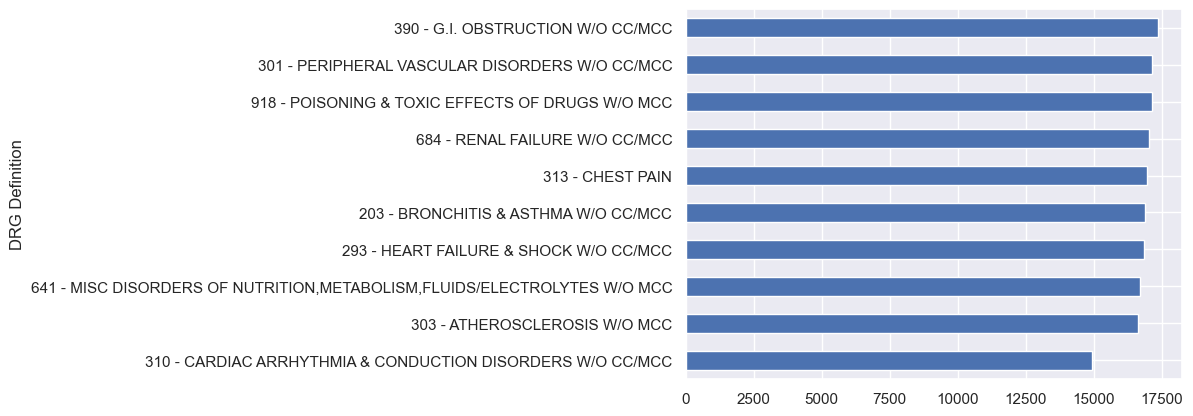

In [6]:
data.groupby('DRG Definition')[' Average Covered Charges '].mean(
    ).sort_values()[:10].plot.barh(x=' Average Covered Charges ', y='DRG Definition')
plt.savefig('../Outputs/drg_def_acc_barh.png', bbox_inches='tight')
plt.show()

#### DRG Definition vs Average Total Payments

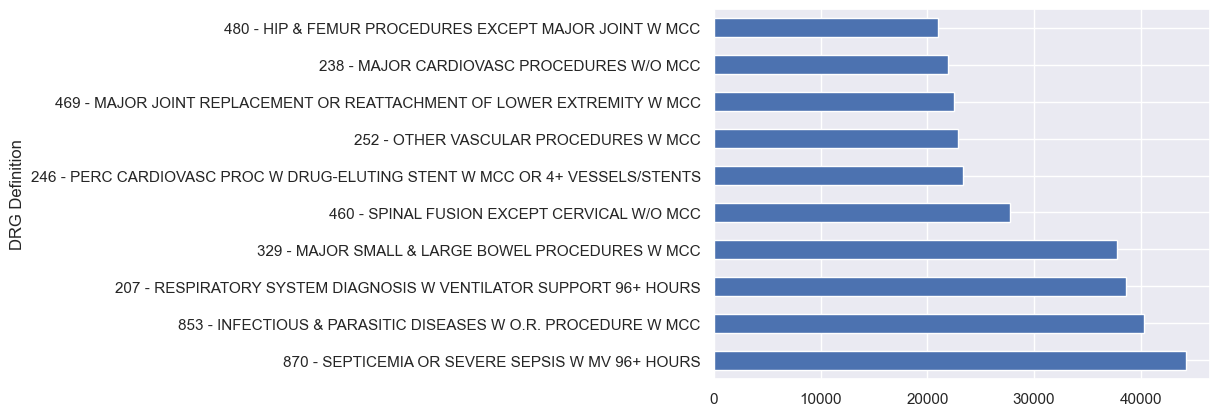

In [7]:
data.groupby('DRG Definition')[' Average Total Payments '].mean(
    ).sort_values(ascending=False)[:10].plot.barh(x=' Average Total Payments ', y='DRG Definition')
plt.savefig('../Outputs/drg_def_atp_barh.png', bbox_inches='tight')
plt.show()

#### DRG Definition vs Average Medicare Payments

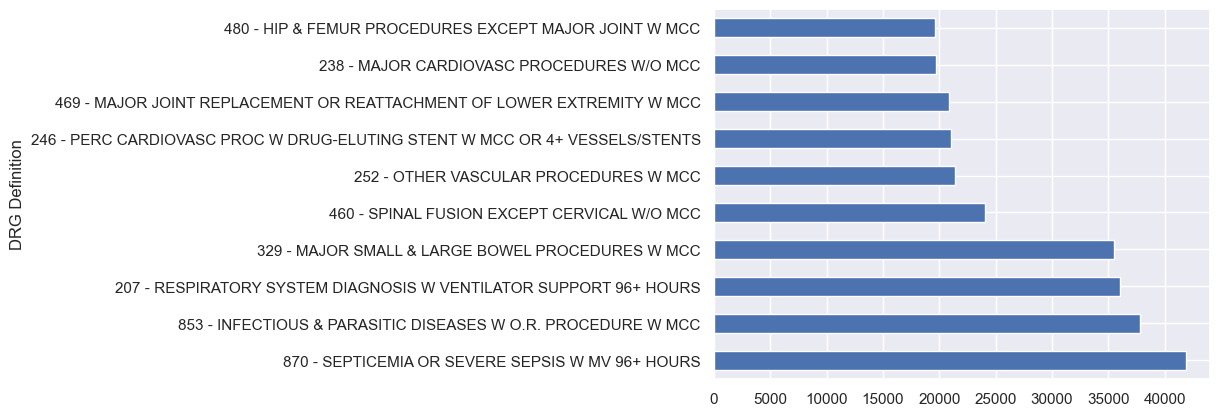

In [8]:
data.groupby('DRG Definition')['Average Medicare Payments'].mean(
    ).sort_values(ascending=False)[:10].plot.barh(x='Average Medicare Payments', y='DRG Definition')
plt.savefig('../Outputs/drg_def_amp_barh.png', bbox_inches='tight')
plt.show()

#### Provider Name vs Average Covered Charges

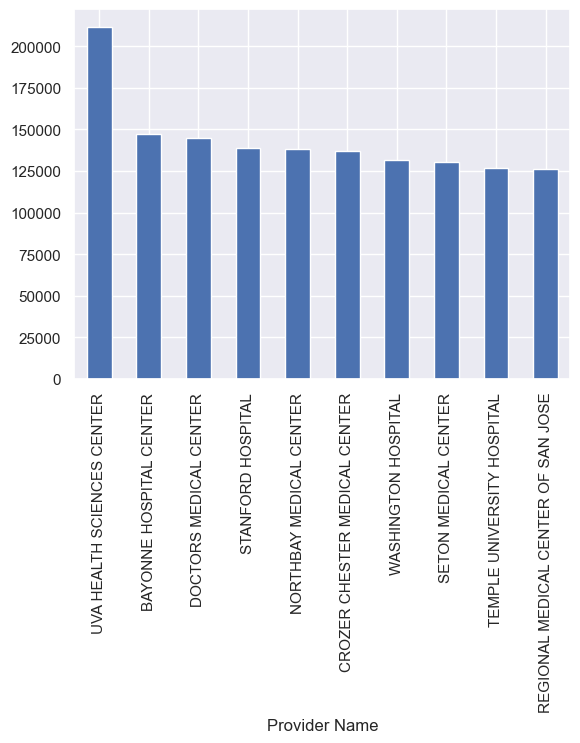

In [9]:
data.groupby('Provider Name')[' Average Covered Charges '].mean(
    ).sort_values(ascending=False)[:10].plot.bar()
plt.savefig('../Outputs/provider_name_acc_bar.png', bbox_inches='tight')
plt.show()

#### Provider Name vs Average Total Payments

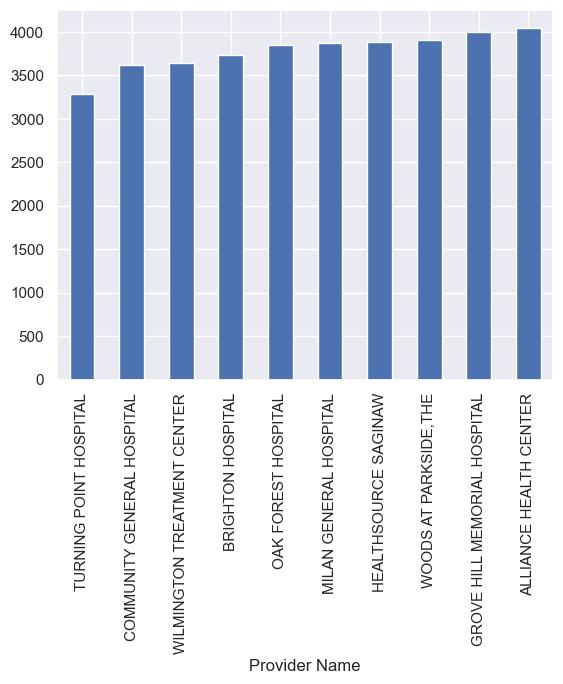

In [10]:
data.groupby('Provider Name')[' Average Total Payments '].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_name_atp_bar.png', bbox_inches='tight')
plt.show()

#### Provider Name vs Average Medicare Payments

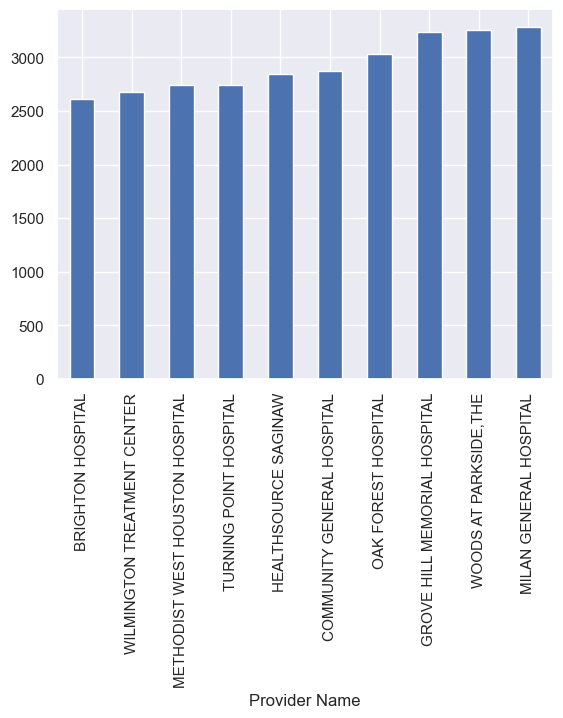

In [11]:
data.groupby('Provider Name')['Average Medicare Payments'].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_name_amp_bar.png', bbox_inches='tight')
plt.show()

#### Let's shuffle the Treatment providers based on the total discharges

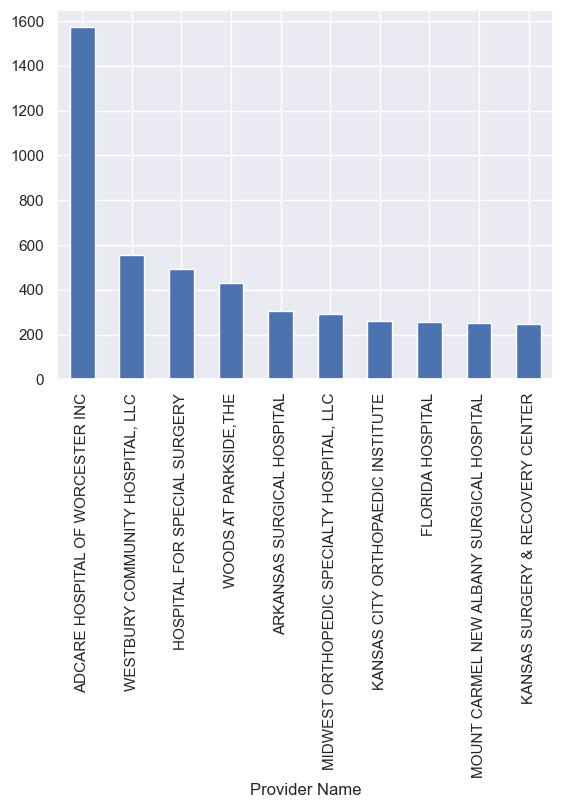

In [12]:
data.groupby('Provider Name')[' Total Discharges '].mean(
    ).sort_values(ascending=False)[:10].plot.bar()
plt.savefig('../Outputs/provider_name_total_discharge_bar.png', bbox_inches='tight')
plt.show()

#### Provider State vs Average Covered Charges

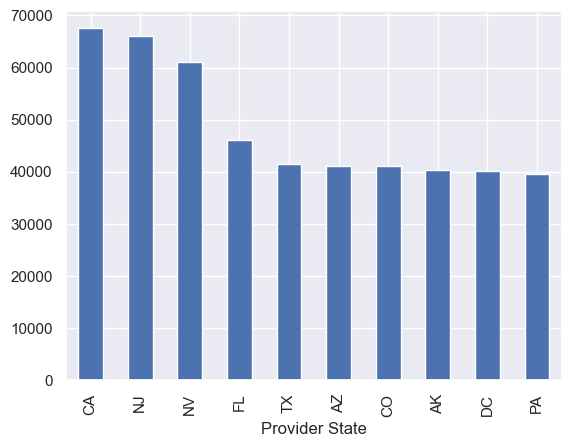

In [13]:
data.groupby('Provider State')[' Average Covered Charges '].mean(
    ).sort_values(ascending=False)[:10].plot.bar()
plt.savefig('../Outputs/provider_state_acc_bar.png', bbox_inches='tight')
plt.show()

#### Provider State vs Average Total Payments

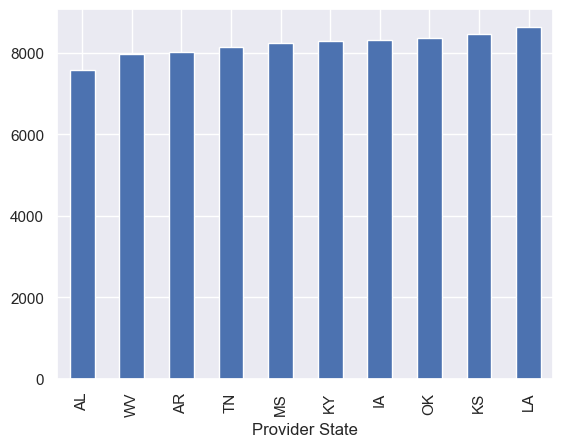

In [14]:
data.groupby('Provider State')[' Average Total Payments '].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_state_atp_bar.png', bbox_inches='tight')
plt.show()

#### Provider State vs Average Medicare Payments

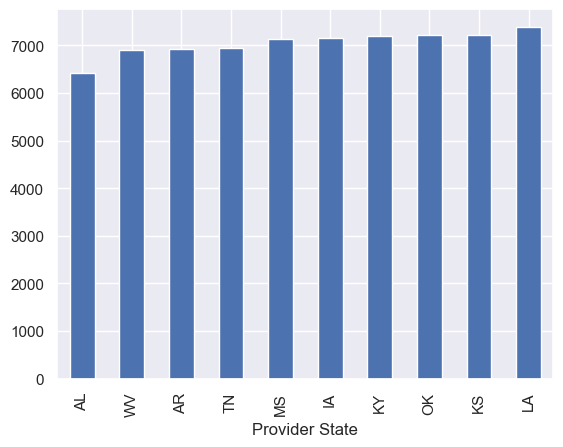

In [15]:
data.groupby('Provider State')['Average Medicare Payments'].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_state_amp_bar.png', bbox_inches='tight')
plt.show()

#### Provider City vs Average Covered Charges

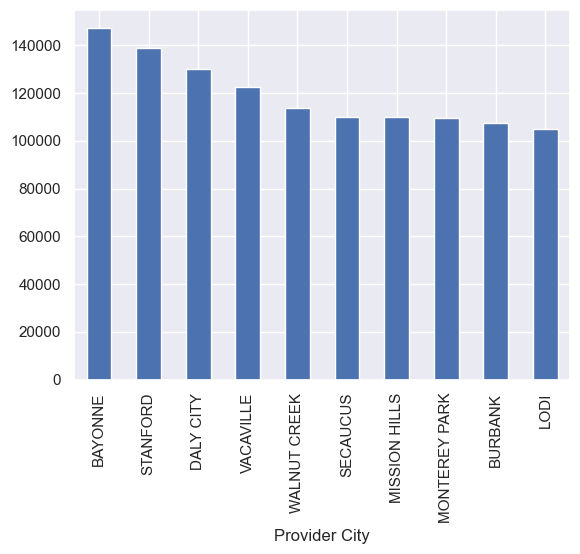

In [16]:
data.groupby('Provider City')[' Average Covered Charges '].mean(
    ).sort_values(ascending=False)[:10].plot.bar()
plt.savefig('../Outputs/provider_city_acc_bar.png', bbox_inches='tight')
plt.show()

#### Provider City vs Average Total Payments

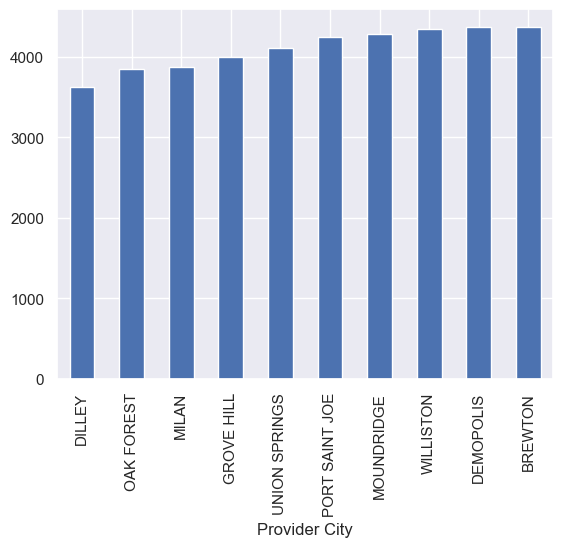

In [17]:
data.groupby('Provider City')[' Average Total Payments '].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_city_atp_bar.png', bbox_inches='tight')
plt.show()

#### Provider City vs Average Medicare Payments

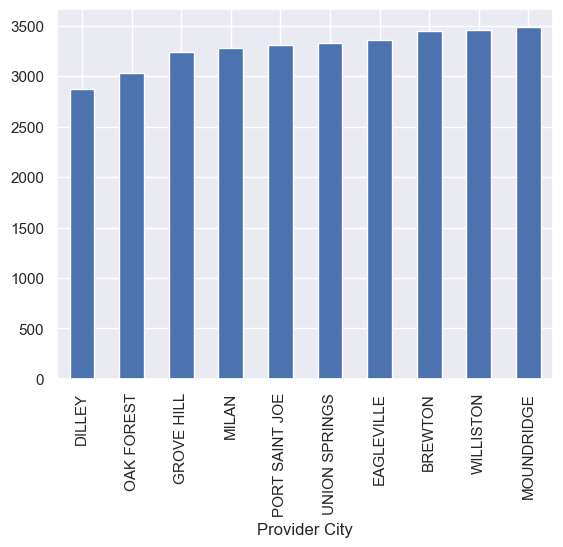

In [18]:
data.groupby('Provider City')['Average Medicare Payments'].mean(
    ).sort_values()[:10].plot.bar()
plt.savefig('../Outputs/provider_city_amp_bar.png', bbox_inches='tight')
plt.show()

#### Provider Name vs Average Covered Charges vs Average Total Payments vs Average Medicare Payments

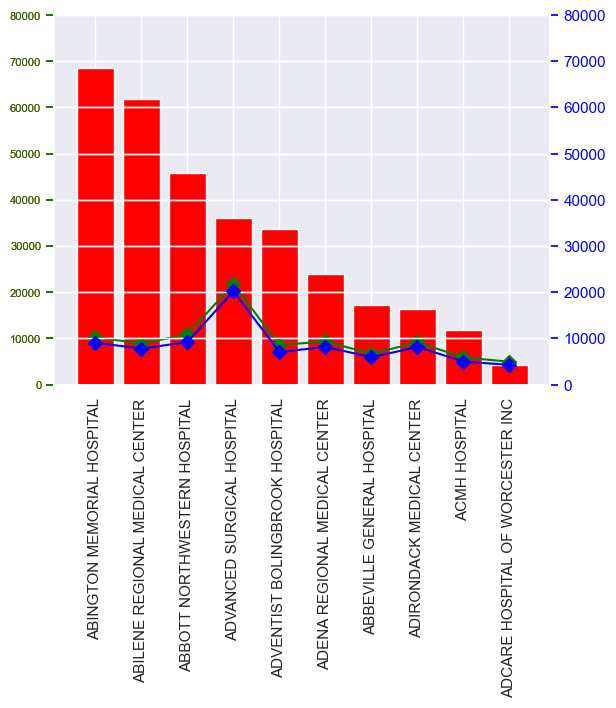

In [19]:
df = pd.DataFrame(data.groupby('Provider Name')[' Average Covered Charges '].mean()[:10].round(2))
payments = pd.DataFrame(data.groupby('Provider Name')[' Average Total Payments '].mean()[:10].round(2))
medicare_payments = pd.DataFrame(data.groupby('Provider Name')['Average Medicare Payments'].mean()[:10].round(2))
df = pd.concat([df, payments, medicare_payments], axis = 1)
df = df.sort_values(by=' Average Covered Charges ', ascending=False)
fig, ax = plt.subplots()
ax.bar(df.index, df[' Average Covered Charges '], color="red")
ax2 = ax.twinx()
ax2.plot(df.index, df[' Average Total Payments '], color="green", marker="D", ms=7)
ax3 = ax2.twinx()
ax3.plot(df.index, df['Average Medicare Payments'], color="blue", marker="D", ms=7)

ax.tick_params(axis="x", labelrotation=90)
ax.tick_params(axis="y", colors="red", labelsize=8)
ax2.tick_params(axis="y", colors="green", labelsize=8)
ax3.tick_params(axis="y", colors="blue")

ax.set_ylim(0, 80000)
ax2.set_ylim(0, 80000)
ax3.set_ylim(0, 80000)
plt.savefig('../Outputs/provider_name_acc_atp_amp.png', bbox_inches='tight')
plt.show()

#### From the above graph Abington Memorial hospital seems to be decent choice for medical treatment in general

#### Provider State vs Average Covered Charges vs Average Total Payments vs Average Medicare Payments

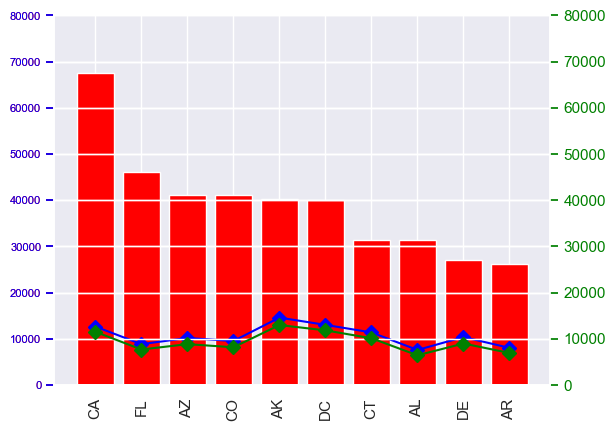

In [20]:
df = pd.DataFrame(data.groupby('Provider State')[' Average Covered Charges '].mean()[:10].round(2))
payments = pd.DataFrame(data.groupby('Provider State')[' Average Total Payments '].mean()[:10].round(2))
medicare_payments = pd.DataFrame(data.groupby('Provider State')['Average Medicare Payments'].mean()[:10].round(2))
df = pd.concat([df, payments, medicare_payments], axis = 1)
df = df.sort_values(by=' Average Covered Charges ', ascending=False)
fig, ax = plt.subplots()
ax.bar(df.index, df[' Average Covered Charges '], color="red")
ax2 = ax.twinx()
ax2.plot(df.index, df[' Average Total Payments '], color="blue", marker="D", ms=7)
ax3 = ax2.twinx()
ax3.plot(df.index, df['Average Medicare Payments'], color="green", marker="D", ms=7)

ax.tick_params(axis="x", labelrotation=90)
ax.tick_params(axis="y", colors="red", labelsize=8)
ax2.tick_params(axis="y", colors="blue", labelsize=8)
ax3.tick_params(axis="y", colors="green")

ax.set_ylim(0, 80000)
ax2.set_ylim(0, 80000)
ax3.set_ylim(0, 80000)
plt.savefig('../Outputs/provider_state_acc_atp_amp.png', bbox_inches='tight')
plt.show()

#### It's observed from the above graph that CA seems to be a good destination for medical services

#### Provider City vs Average Covered Charges vs Average Total Payments vs Average Medicare Payments

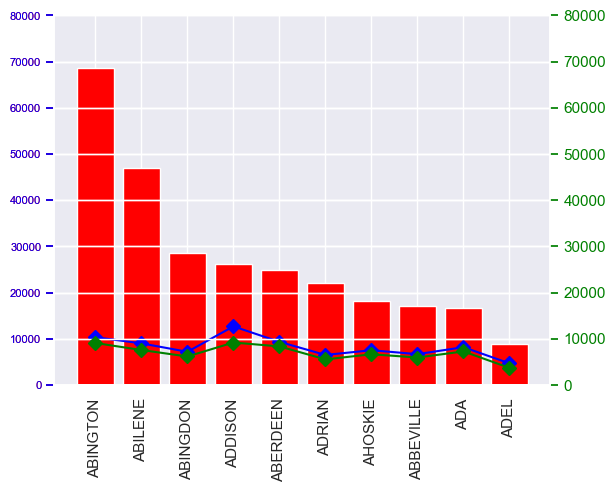

In [21]:
df = pd.DataFrame(data.groupby('Provider City')[' Average Covered Charges '].mean()[:10].round(2))
payments = pd.DataFrame(data.groupby('Provider City')[' Average Total Payments '].mean()[:10].round(2))
medicare_payments = pd.DataFrame(data.groupby('Provider City')['Average Medicare Payments'].mean()[:10].round(2))
df = pd.concat([df, payments, medicare_payments], axis = 1)
df = df.sort_values(by=' Average Covered Charges ', ascending=False)
fig, ax = plt.subplots()
ax.bar(df.index, df[' Average Covered Charges '], color="red")
ax2 = ax.twinx()
ax2.plot(df.index, df[' Average Total Payments '], color="blue", marker="D", ms=7)
ax3 = ax2.twinx()
ax3.plot(df.index, df['Average Medicare Payments'], color="green", marker="D", ms=7)

ax.tick_params(axis="x", labelrotation=90)
ax.tick_params(axis="y", colors="red", labelsize=8)
ax2.tick_params(axis="y", colors="blue", labelsize=8)
ax3.tick_params(axis="y", colors="green")

ax.set_ylim(0, 80000)
ax2.set_ylim(0, 80000)
ax3.set_ylim(0, 80000)
plt.savefig('../Outputs/provider_city_acc_atp_amp.png', bbox_inches='tight')
plt.show()

#### City of Abington in overall seems to be a good place for medical treatment as shown in the above graph

### After some exploration, let's proceed with constructing a suitable and related data preprocessing

### It's found that certain columns are not relevant features so we proceed by droping them

In [22]:
data = data.drop(['Provider Id', 'Provider Street Address',
                      'Provider City', 'Provider State', ' Total Discharges '], axis=1)
data.describe(include='all')

,DRG Definition,Provider Name,Provider Zip Code,Hospital Referral Region Description,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065,163065,163065,163065,163065.000000,163065.000000,163065.000000
unique,100,3201,3053,306,NaN,NaN,NaN
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,GOOD SAMARITAN HOSPITAL,76104,CA - Los Angeles,NaN,NaN,NaN
freq,3023,633,317,3653,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,36133.954224,9707.473804,8494.490964
std,NaN,NaN,NaN,NaN,35065.365931,7664.642598,7309.467261
min,NaN,NaN,NaN,NaN,2459.400000,2673.000000,1148.900000
25%,NaN,NaN,NaN,NaN,15947.160000,5234.500000,4192.350000
50%,NaN,NaN,NaN,NaN,25245.820000,7214.100000,6158.460000
75%,NaN,NaN,NaN,NaN,43232.590000,11286.400000,10056.880000


In [23]:
data.isnull().sum()

DRG Definition                          0
Provider Name                           0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 7 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Name                         163065 non-null  object 
 2   Provider Zip Code                     163065 non-null  object 
 3   Hospital Referral Region Description  163065 non-null  object 
 4    Average Covered Charges              163065 non-null  float64
 5    Average Total Payments               163065 non-null  float64
 6   Average Medicare Payments             163065 non-null  float64
dtypes: float64(3), object(4)
memory usage: 8.7+ MB


### It's much necessary to ensure that we exclude outliers while modeling so, let's explore all numerical data for the same

<Axes: xlabel=' Average Covered Charges ', ylabel='Density'>

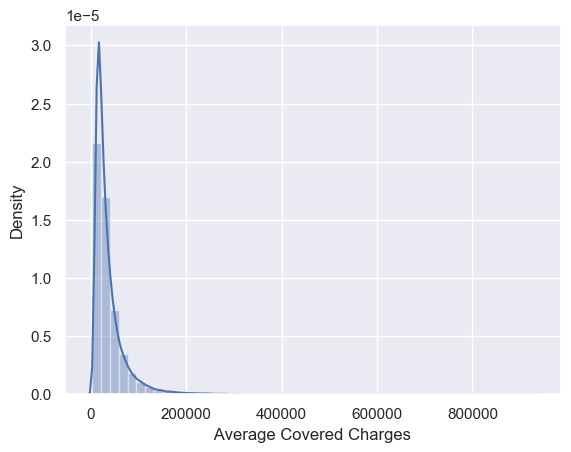

In [25]:
sns.distplot(data[' Average Covered Charges '])

### For 'Average Covered Charges' we observe that there's indeed outliers that could affect our modelling so, let's handle that

In [26]:
# Let's declare a variable that will be equal to the 99th percentile of the ' Average Covered Charges ' variable
q = data[' Average Covered Charges '].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of ' Average Covered Charges '
data_1 = data[data[' Average Covered Charges '] < q]
# In this way we have essentially removed the top 1% of the data about ' Average Covered Charges '
data_1.describe(include='all')

,DRG Definition,Provider Name,Provider Zip Code,Hospital Referral Region Description,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,161434,161434,161434,161434,161434.000000,161434.000000,161434.000000
unique,100,3200,3053,306,NaN,NaN,NaN
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,GOOD SAMARITAN HOSPITAL,76104,CA - Los Angeles,NaN,NaN,NaN
freq,3023,616,314,3467,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,34029.444906,9375.863636,8177.494863
std,NaN,NaN,NaN,NaN,27221.521223,6777.283442,6453.635855
min,NaN,NaN,NaN,NaN,2459.400000,2673.000000,1148.900000
25%,NaN,NaN,NaN,NaN,15867.017500,5216.260000,4172.352500
50%,NaN,NaN,NaN,NaN,25009.955000,7164.495000,6108.595000
75%,NaN,NaN,NaN,NaN,42426.185000,11124.770000,9909.752500


### From the graph below we can tell that we were able to eliminate a lot of outliers by removing not much of a data (1%)

<Axes: xlabel=' Average Covered Charges ', ylabel='Density'>

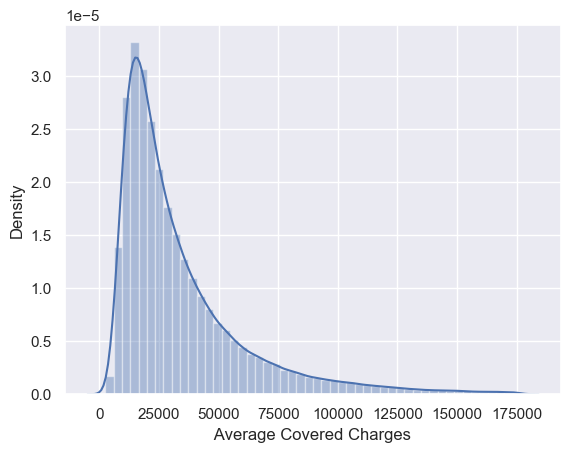

In [27]:
sns.distplot(data_1[' Average Covered Charges '])

### Let's explore 'Average Total Payments' for outliers

<Axes: xlabel=' Average Total Payments ', ylabel='Density'>

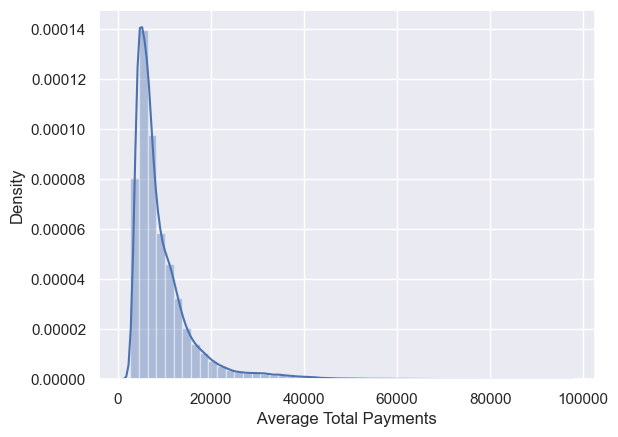

In [28]:
sns.distplot(data_1[' Average Total Payments '])

### There are outliers so let's handle it

In [29]:
q = data_1[' Average Total Payments '].quantile(0.99)
data_2 = data_1[data_1[' Average Total Payments '] < q]

### Much of the outliers are eliminated as observed below

<Axes: xlabel=' Average Total Payments ', ylabel='Density'>

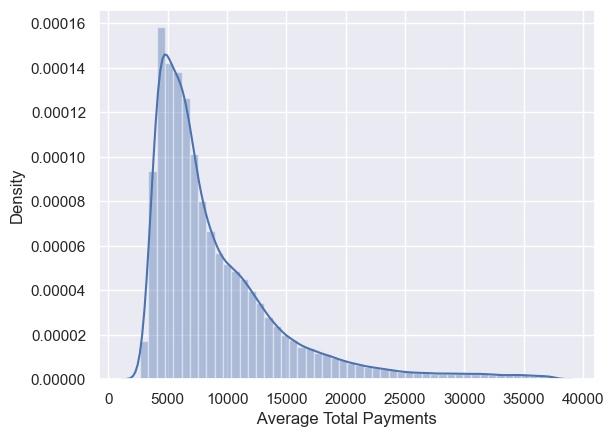

In [30]:
sns.distplot(data_2[' Average Total Payments '])

### For the 'Average Medicare Payments', there seems to be acceptable amount of outliers now

<Axes: xlabel='Average Medicare Payments', ylabel='Density'>

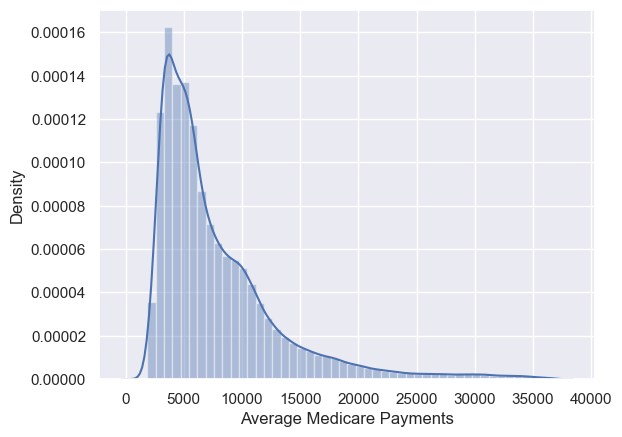

In [31]:
sns.distplot(data_2['Average Medicare Payments'])

### We still have significant amount of data for our analysis purpose as shown below so, let's proceed with model development

In [32]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include='all')

,DRG Definition,Provider Name,Provider Zip Code,Hospital Referral Region Description,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,159819,159819,159819,159819,159819.000000,159819.000000,159819.000000
unique,100,3200,3053,306,NaN,NaN,NaN
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,GOOD SAMARITAN HOSPITAL,76104,CA - Los Angeles,NaN,NaN,NaN
freq,3023,608,307,3432,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,33214.413933,9006.435800,7832.553580
std,NaN,NaN,NaN,NaN,25857.409828,5658.149234,5412.023813
min,NaN,NaN,NaN,NaN,2459.400000,2673.000000,1148.900000
25%,NaN,NaN,NaN,NaN,15798.230000,5199.000000,4153.770000
50%,NaN,NaN,NaN,NaN,24776.520000,7116.000000,6060.500000
75%,NaN,NaN,NaN,NaN,41659.525000,10965.950000,9768.460000


### Define and assign targets for each dependent variable relevent for our analysis since, they're all independent of each other.

In [33]:
# The targets (dependent variables) are as follows
target_1 = data_cleaned[' Average Covered Charges ']
target_2 = data_cleaned[' Average Total Payments ']
target_3 = data_cleaned['Average Medicare Payments']

# The inputs are everything BUT the dependent variables, so we can simply drop it
inputs = data_cleaned.drop([' Average Covered Charges ', ' Average Total Payments ', 'Average Medicare Payments'], axis=1)
inputs.describe()

,DRG Definition,Provider Name,Provider Zip Code,Hospital Referral Region Description
count,159819,159819,159819,159819
unique,100,3200,3053,306
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,GOOD SAMARITAN HOSPITAL,76104,CA - Los Angeles
freq,3023,608,307,3432


### Split the data into training and test set for each defined targests before hand to avoid data leakage at next steps

In [34]:
from sklearn.model_selection import train_test_split


x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(inputs, target_1, test_size=0.2, random_state=365)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(inputs, target_2, test_size=0.2, random_state=365)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(inputs, target_3, test_size=0.2, random_state=365)

### Encode all catagorical data using "Leave One Out" encoding technique for each training set of 3 data

In [35]:
import category_encoders as ce


encoder_1 = ce.LeaveOneOutEncoder(return_df=True)
x_train_1_loo = encoder_1.fit_transform(x_train_1, y_train_1)
x_test_1_loo = encoder_1.transform(x_test_1)

encoder_2 = ce.LeaveOneOutEncoder(return_df=True)
x_train_2_loo = encoder_2.fit_transform(x_train_2, y_train_2)
x_test_2_loo = encoder_2.transform(x_test_2)

encoder_3 = ce.LeaveOneOutEncoder(return_df=True)
x_train_3_loo = encoder_3.fit_transform(x_train_3, y_train_3)
x_test_3_loo = encoder_3.transform(x_test_3)

### Scale the training data

In [36]:
from sklearn.preprocessing import StandardScaler


scaler_1 = StandardScaler()
scaler_1.fit(x_train_1_loo)

scaler_2 = StandardScaler()
scaler_2.fit(x_train_2_loo)

scaler_3 = StandardScaler()
scaler_3.fit(x_train_3_loo)

StandardScaler()

In [37]:
x_train_1_loo_scaled = scaler_1.transform(x_train_1_loo)

x_train_2_loo_scaled = scaler_2.transform(x_train_2_loo)

x_train_3_loo_scaled = scaler_3.transform(x_train_3_loo)

### Finally train Linear Regression models for each independent target and training sets

In [38]:
reg_1 = LinearRegression()
reg_1.fit(x_train_1_loo_scaled, y_train_1)

reg_2 = LinearRegression()
reg_2.fit(x_train_2_loo_scaled, y_train_2)

reg_3 = LinearRegression()
reg_3.fit(x_train_3_loo_scaled, y_train_3)

LinearRegression()

### Our model is ready so let's see how well it performs

In [39]:
y1_hat = reg_1.predict(x_train_1_loo_scaled)

y2_hat = reg_2.predict(x_train_2_loo_scaled)

y3_hat = reg_3.predict(x_train_3_loo_scaled)

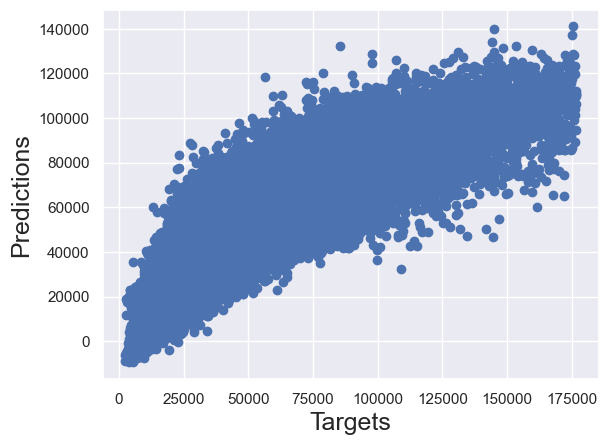

In [40]:
plt.scatter(y_train_1, y1_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

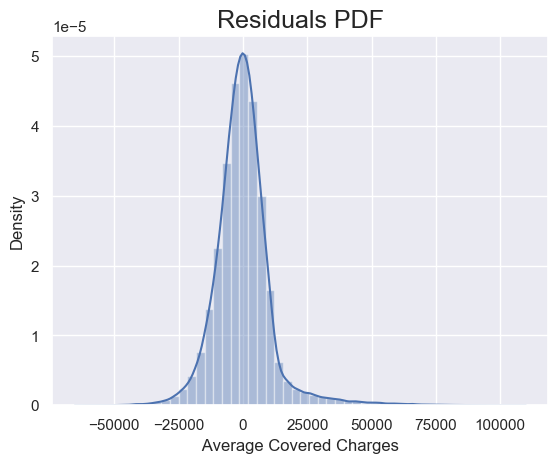

In [41]:
sns.distplot(y_train_1 - y1_hat)
plt.title("Residuals PDF", size=18)

In [42]:
# Function to find Adjusted R^2
def adj_r2(reg, x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

### The Adjusted R squared value of 1st model seems to be impressive, indicating our model predicted quite accurately during the training

In [43]:
adj_r2(reg_1, x_train_1_loo_scaled, y_train_1)

0.8151951929633128

### The p-values also indicate that the features are quite significant for our analysis

In [44]:
from sklearn.feature_selection import f_regression


p_values = f_regression(x_train_1_loo_scaled, y_train_1)[1]
p_values.round(4)

array([0., 0., 0., 0.])

### Let's now scale and test the model with the testing set

In [45]:
x_test_1_loo_scaled = scaler_1.transform(x_test_1_loo)

In [46]:
y1_hat_test = reg_1.predict(x_test_1_loo_scaled)
y1_hat_test

array([ 6565.58488695, 31299.25712663, 10959.92954471, ...,
        6470.03736468, 36631.75709448,  3745.90192808])

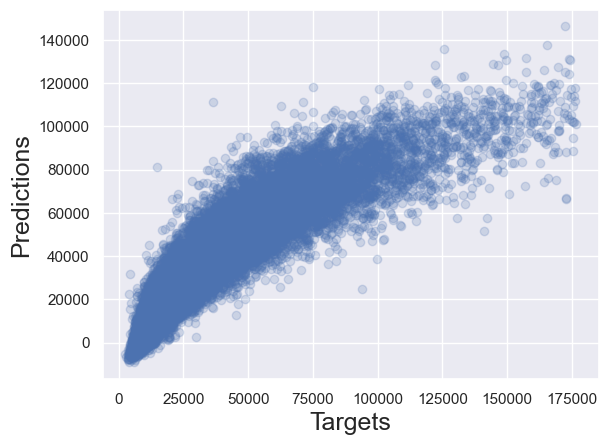

In [47]:
plt.scatter(y_test_1, y1_hat_test, alpha=0.2)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

### The Adjusted R squared value is a bit less for test set which is expected but, still seems quite impressive

In [48]:
adj_r2(reg_1, x_test_1_loo_scaled, y_test_1)

0.8136205349918032

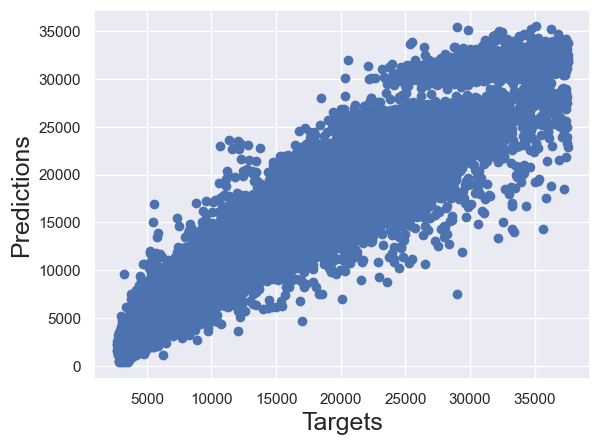

In [49]:
plt.scatter(y_train_2, y2_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

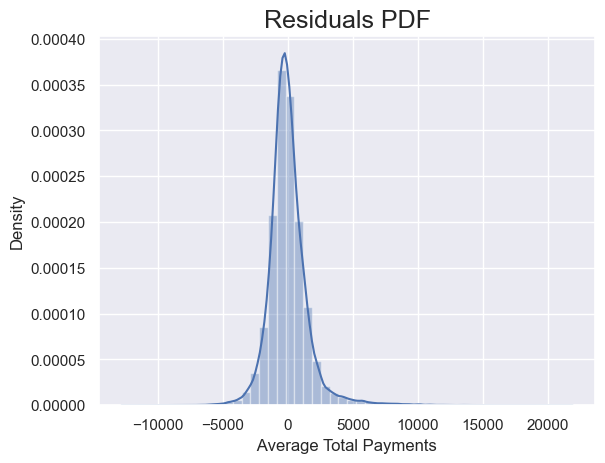

In [50]:
sns.distplot(y_train_2 - y2_hat)
plt.title("Residuals PDF", size=18)

### The Adjusted R squared value of 2nd Model seems very impressive

In [51]:
adj_r2(reg_2, x_train_2_loo_scaled, y_train_2)

0.9225926120841212

### The p-values confirm that all features considered are significant for our model

In [52]:
p_values = f_regression(x_train_2_loo_scaled, y_train_2)[1]
p_values.round(4)

array([0., 0., 0., 0.])

### Let's now test the 2nd model

In [53]:
x_test_2_loo_scaled = scaler_2.transform(x_test_2_loo)

In [54]:
y2_hat_test = reg_2.predict(x_test_2_loo_scaled)
y2_hat_test

array([ 3742.29090541,  8218.04445175,  4653.58195434, ...,
        9361.66144118, 11458.06327502,  3100.52099549])

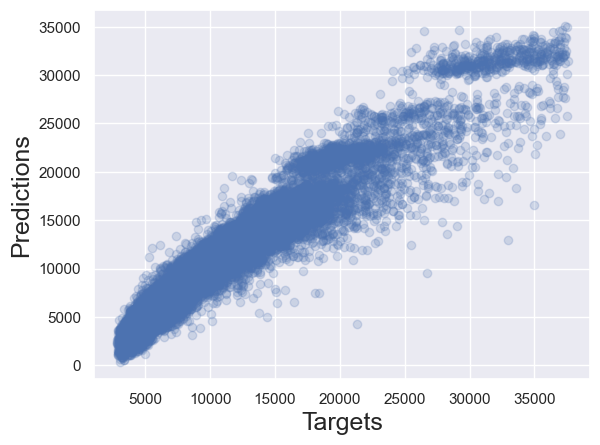

In [55]:
plt.scatter(y_test_2, y2_hat_test, alpha=0.2)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

### The score for test sets are as impressive as the training ones

In [56]:
adj_r2(reg_2, x_test_2_loo_scaled, y_test_2)

0.923995960810722

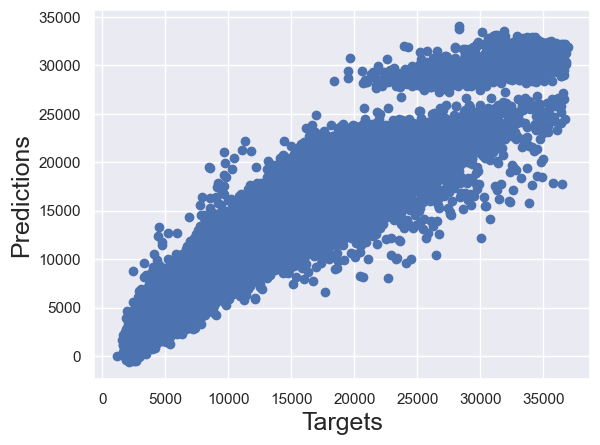

In [57]:
plt.scatter(y_train_3, y3_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

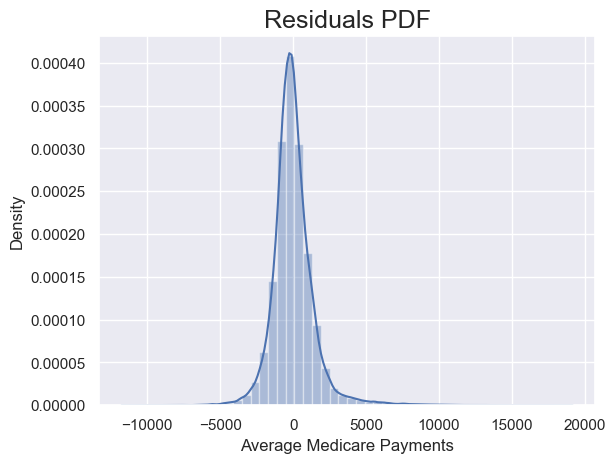

In [58]:
sns.distplot(y_train_3 - y3_hat)
plt.title("Residuals PDF", size=18)

### The Adjusted R squared value is impressive for 3rd model as well

In [59]:
adj_r2(reg_3, x_train_3_loo_scaled, y_train_3)

0.9264586752369559

### The significance based on p-values is also confirmed

In [60]:
p_values = f_regression(x_train_3_loo_scaled, y_train_3)[1]
p_values.round(4)

array([0., 0., 0., 0.])

In [61]:
x_test_3_loo_scaled = scaler_3.transform(x_test_3_loo)

In [62]:
y3_hat_test = reg_3.predict(x_test_3_loo_scaled)
y3_hat_test

array([ 2841.75639787,  6941.34327876,  3675.69867055, ...,
        8145.52746362, 10444.81620753,  2286.76451282])

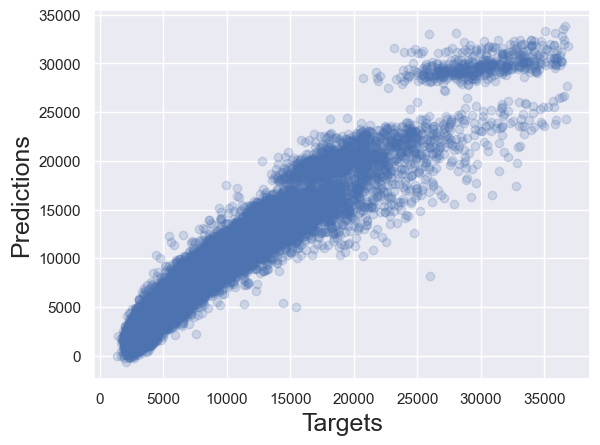

In [63]:
plt.scatter(y_test_3, y3_hat_test, alpha=0.2)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.show()

### The test score is also impressive than expected

In [64]:
adj_r2(reg_3, x_test_3_loo_scaled, y_test_3)

0.9279038296309875

### Finally we deploy the model simultaneously as we iterate it towards further improvement

In [65]:
import pickle

# Dump the Models into binary files
with open('../Deployment/.bins/model_covered_charges', 'wb') as file:
    pickle.dump(reg_1, file)
with open('../Deployment/.bins/model_total_payments', 'wb') as file:
    pickle.dump(reg_2, file)
with open('../Deployment/.bins/model_medicare_payments', 'wb') as file:
    pickle.dump(reg_3, file)

# Dump the scaler objects into binary files
with open('../Deployment/.bins/scaler_covered_charges','wb') as file:
    pickle.dump(scaler_1, file)
with open('../Deployment/.bins/scaler_total_payments','wb') as file:
    pickle.dump(scaler_2, file)
with open('../Deployment/.bins/scaler_medicare_payments','wb') as file:
    pickle.dump(scaler_3, file)

# Dump the encoder objects into binary files
with open('../Deployment/.bins/encoder_covered_charges','wb') as file:
    pickle.dump(encoder_1, file)
with open('../Deployment/.bins/encoder_total_payments','wb') as file:
    pickle.dump(encoder_2, file)
with open('../Deployment/.bins/encoder_medicare_payments','wb') as file:
    pickle.dump(encoder_3, file)